# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Polkadot: Treasury with more than $800 million to be spent on….  The eighth biggest blockchain by market cap, Polkadot, has been making headlines in October. One reason was DOT&#8217;s strong price rally since 13 October, as previously reported. The rally could also be linked to some exciting developments ahead, such as the upcoming parachain launch and the slot auctions. Adding to this chain of events, founder Gavin [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/polkadot-treasury-with-more-than-800-million-to-be-spent-on/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- FDA Nearing Approval for Mixing and Matching Covid-19 Booster Shots.  The agency wouldn’t recommend a specific booster but would allow people to get a different shot from their initial vaccination ... [| Skaityti daugiau](https://www.wsj.com/articles/fda-nearing-approval-for-mixing-and-matching-covid-19-booster-shots-11634599855?mod=hp_lead_pos1) 

### Kainų kaita pandemijos metu

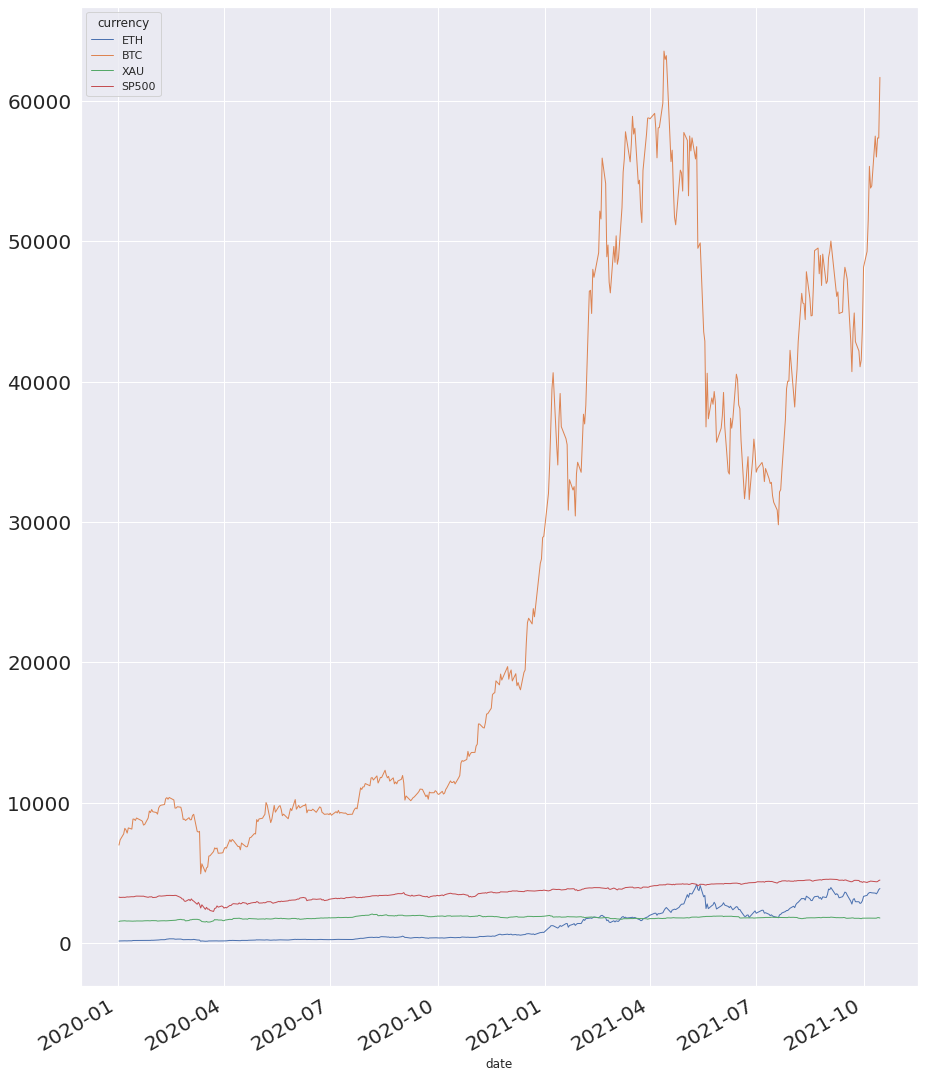

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.891717,0.149643,0.895461
BTC,0.891717,1.000000,0.120888,0.851270
XAU,0.149643,0.120888,1.000000,0.316083
SP500,0.895461,0.851270,0.316083,1.000000


In [8]:
#hide ### Koreliacijos matrica.

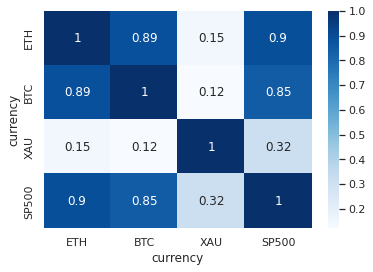

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')